In [2]:
import mitsuba as mi
import drjit as dr
import numpy as np
mi.set_variant('cuda_acoustic')
mi.variant()
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


### Considerations for linear and logarithmically spaced spectra

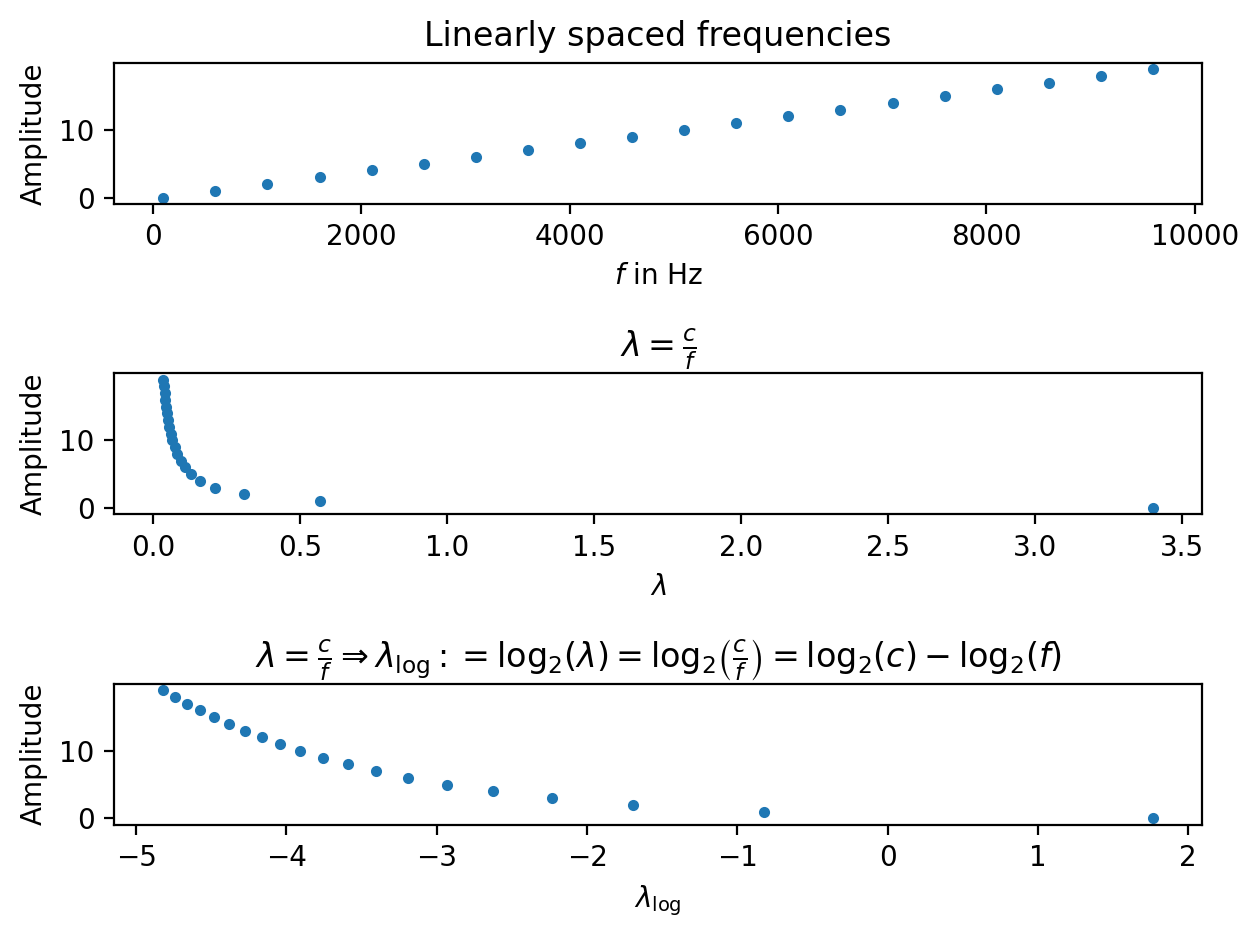

In [3]:
c = 340
# frequencies = np.array([125, 250, 500, 1000, 2000, 4000, 8000, 16000])
f = np.arange(100, 10000, 500)
wavelengths = c / f
wavelengths_log = np.log2(340) - np.log2(f)
values = np.arange(len(f))

fig, ax = plt.subplots(3,1)
ax[0].set_title('Linearly spaced frequencies')
ax[0].plot(f, values, '.')
ax[0].set_xlabel(r'$f$ in Hz')
ax[0].set_ylabel('Amplitude')
ax[1].plot(wavelengths, values, '.')
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel('Amplitude')
ax[1].set_title(r'$\lambda = \frac{c}{f}$')
ax[2].plot(wavelengths_log, values, '.')
ax[2].set_xlabel(r'$\lambda_\mathrm{log}$')
ax[2].set_ylabel('Amplitude')
ax[2].set_title(r'$\lambda = \frac{c}{f} \Rightarrow \lambda_\mathrm{log} := \log_2\left(\lambda \right) = \log_2\left( \frac{c}{f} \right) = \log_2\left( c \right) - \log_2\left( f \right)$')
fig.tight_layout()
plt.show()

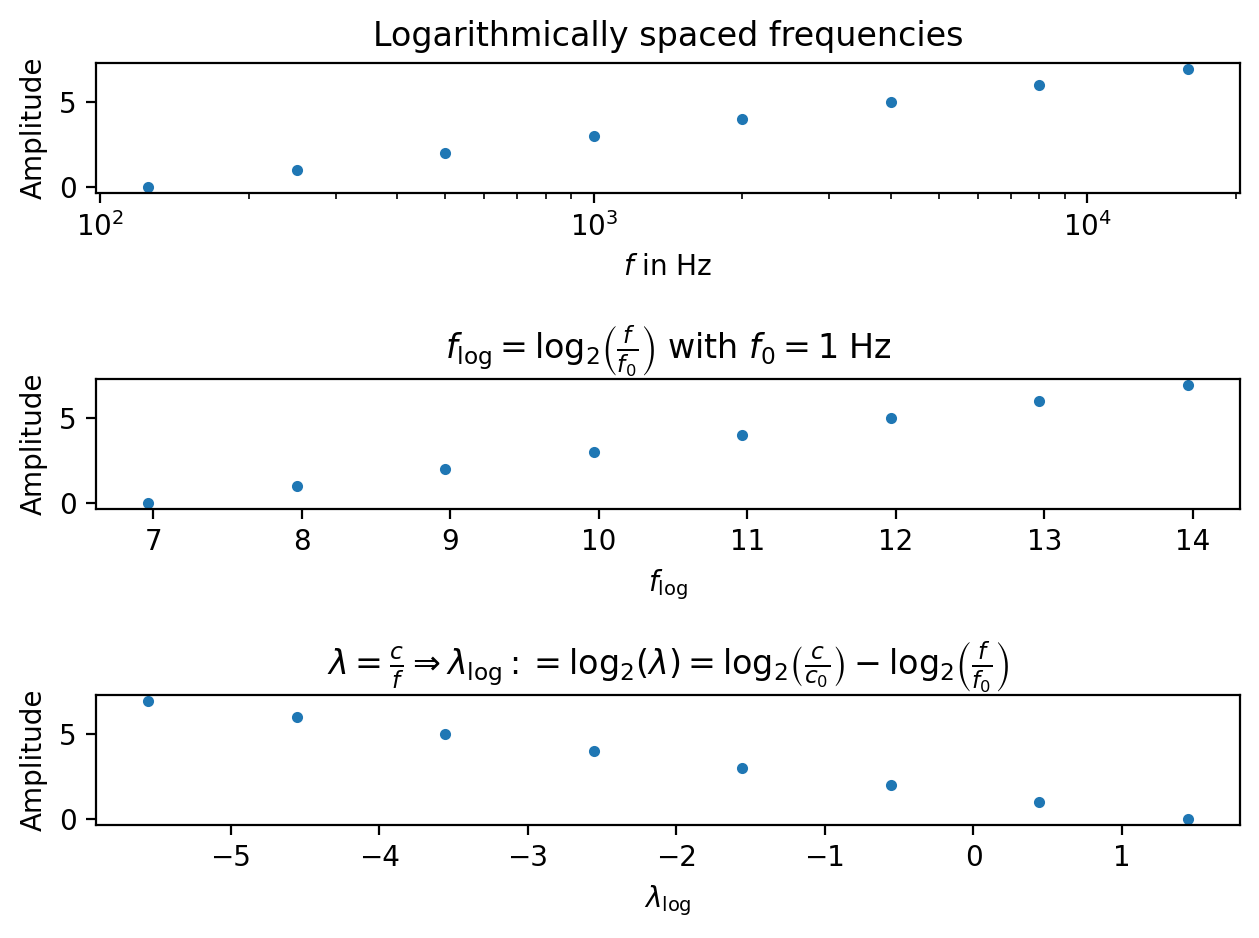

In [4]:
c = 340

f = np.array([125, 250, 500, 1000, 2000, 4000, 8000, 16000])
wavelengths = c/f
wavelengths_log = np.log2(c) - np.log2(f)
values = np.arange(len(f))

fig, ax = plt.subplots(3,1)
ax[0].set_title('Logarithmically spaced frequencies')
ax[0].semilogx(f, values, '.')
ax[0].set_xlabel(r'$f$ in Hz')
ax[0].set_ylabel('Amplitude')
ax[1].plot(np.log2(f), values, '.')
ax[1].set_xlabel(r'$f_\mathrm{log}$')
ax[1].set_ylabel('Amplitude')
ax[1].set_title(r'$f_\mathrm{log} = \log_2\left(\frac{f}{f_0} \right)$ with $f_0 = 1$ Hz')
ax[2].plot(wavelengths_log, values, '.')
ax[2].set_xlabel(r'$\lambda_\mathrm{log}$')
ax[2].set_ylabel('Amplitude')
ax[2].set_title(r'$\lambda = \frac{c}{f} \Rightarrow \lambda_\mathrm{log} := \log_2\left(\lambda \right) = \log_2\left( \frac{c}{c_0} \right) - \log_2\left( \frac{f}{f_0} \right)$')
fig.tight_layout()
plt.show()

# Linear interpolation in frequency space vs linear interpolation in wavelength space



In [5]:
f = np.array([250, 500])
f_log = np.log2(f)

wavelengths = c/f
values = np.arange(len(f))

target_wavelength = 1
target_frequency = c/target_wavelength

print(f'frequencies:\t{f}')
print(f'wavelengths:\t{wavelengths}')
print(f'values: \t{values}\n')

# interpolate in linear frequency space
f_interp = interp1d(f, values)
target_value = f_interp(target_frequency)
print(f'Linear Frequency space:\nThe interpolated value at λ = {target_wavelength} m ({target_frequency} Hz) is {target_value}.\n')

# interpolate in logarithmic frequency space
f_interp = interp1d(f_log, values)
target_value = f_interp(np.log2(target_frequency))
print(f'Logarithmic Frequency space:\nThe interpolated value at λ = {target_wavelength} m ({target_frequency} Hz) is {target_value}.\n')

# interpolate in wavelength space
f_interp = interp1d(wavelengths, values)
target_value = f_interp(target_wavelength)
print(f'Linear Wavelength space:\nThe interpolated value at λ = {target_wavelength} m ({target_frequency} Hz) is {target_value}.')




frequencies:	[250 500]
wavelengths:	[1.36 0.68]
values: 	[0 1]

Linear Frequency space:
The interpolated value at λ = 1 m (340.0 Hz) is 0.36.

Logarithmic Frequency space:
The interpolated value at λ = 1 m (340.0 Hz) is 0.4436066514756156.

Linear Wavelength space:
The interpolated value at λ = 1 m (340.0 Hz) is 0.5294117647058825.


In [41]:
def dB(x):
    x[x == 0] = 1e-10
    level = 20*np.log10(x)
    return level

In [94]:
np.linspace(0, 1, 8)

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

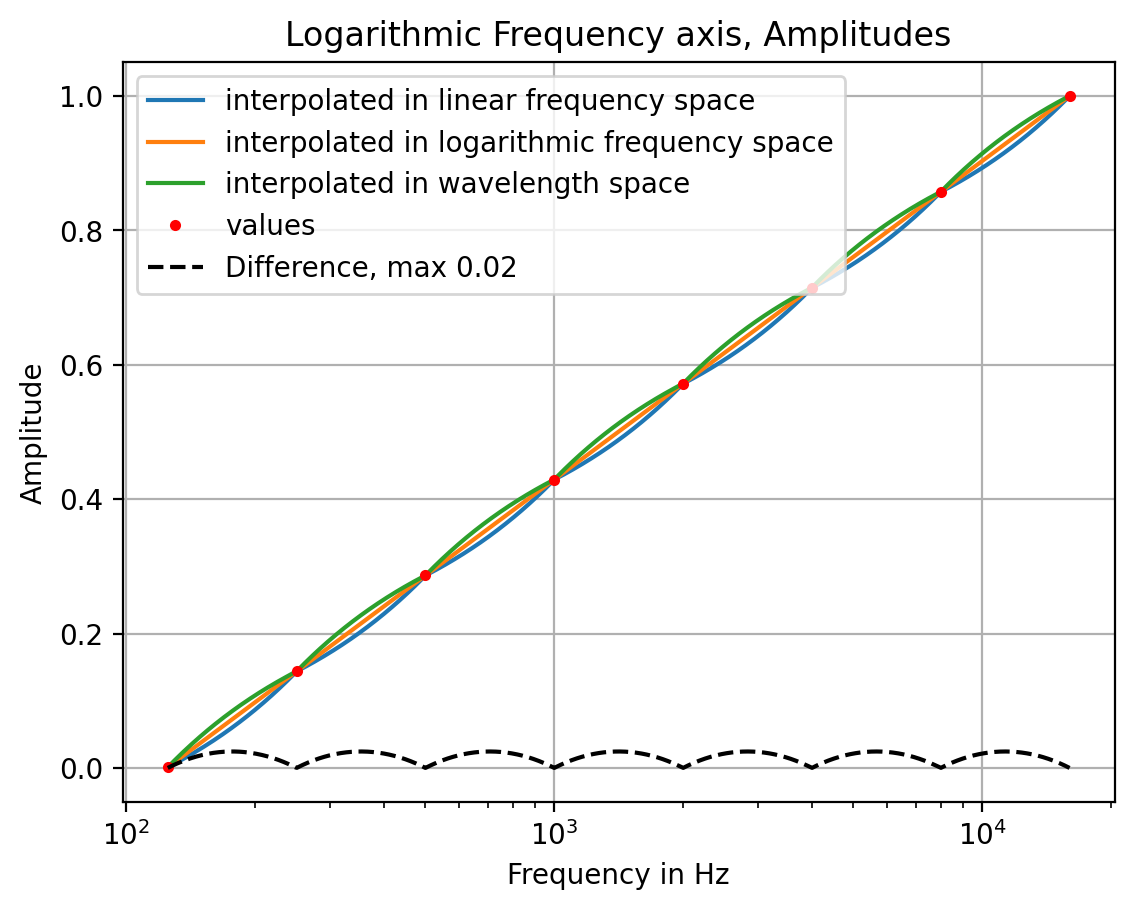

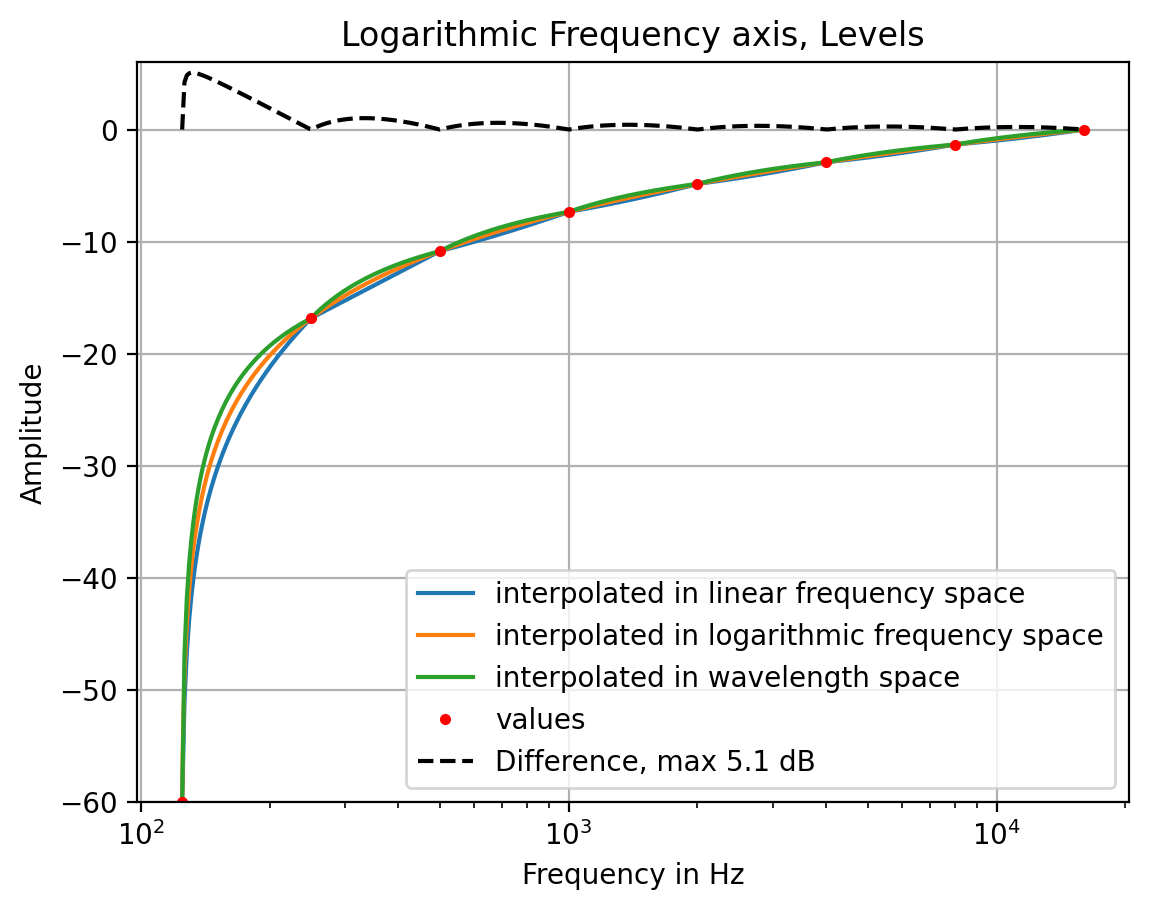

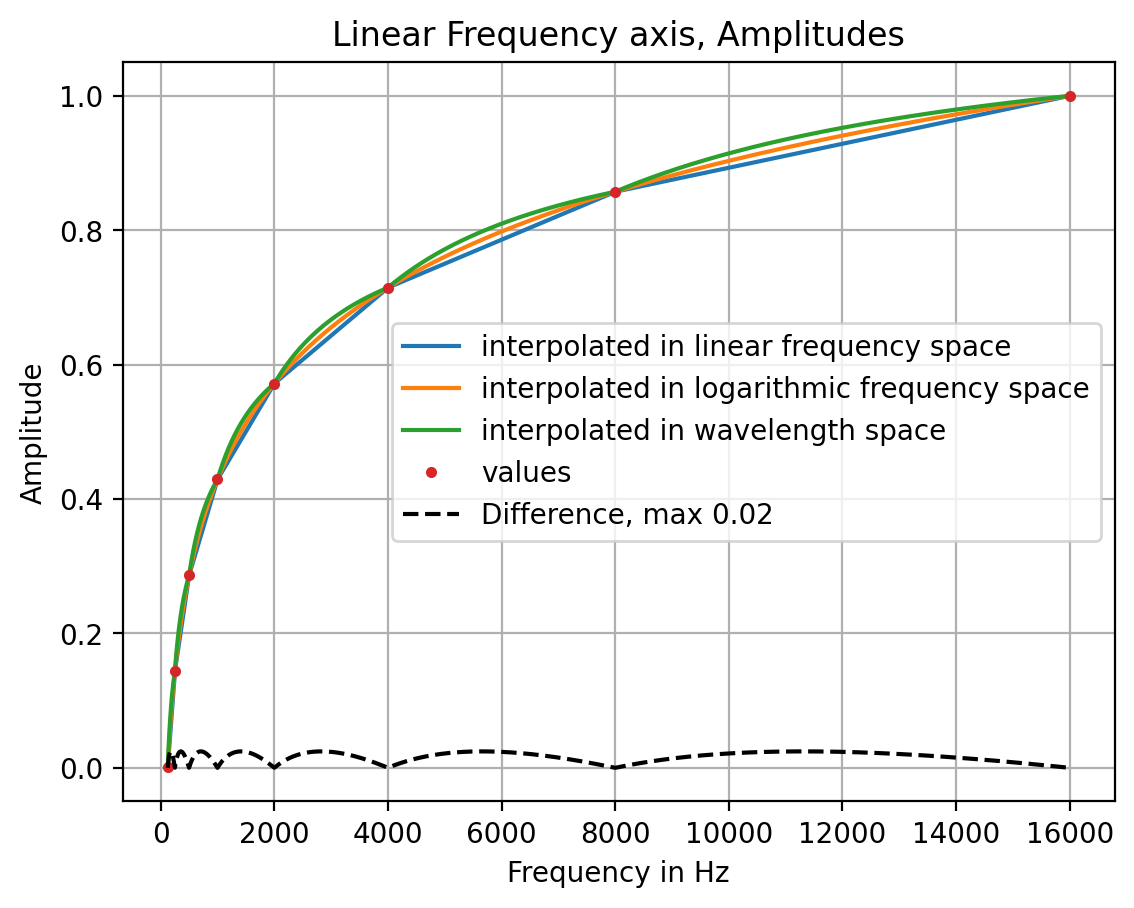

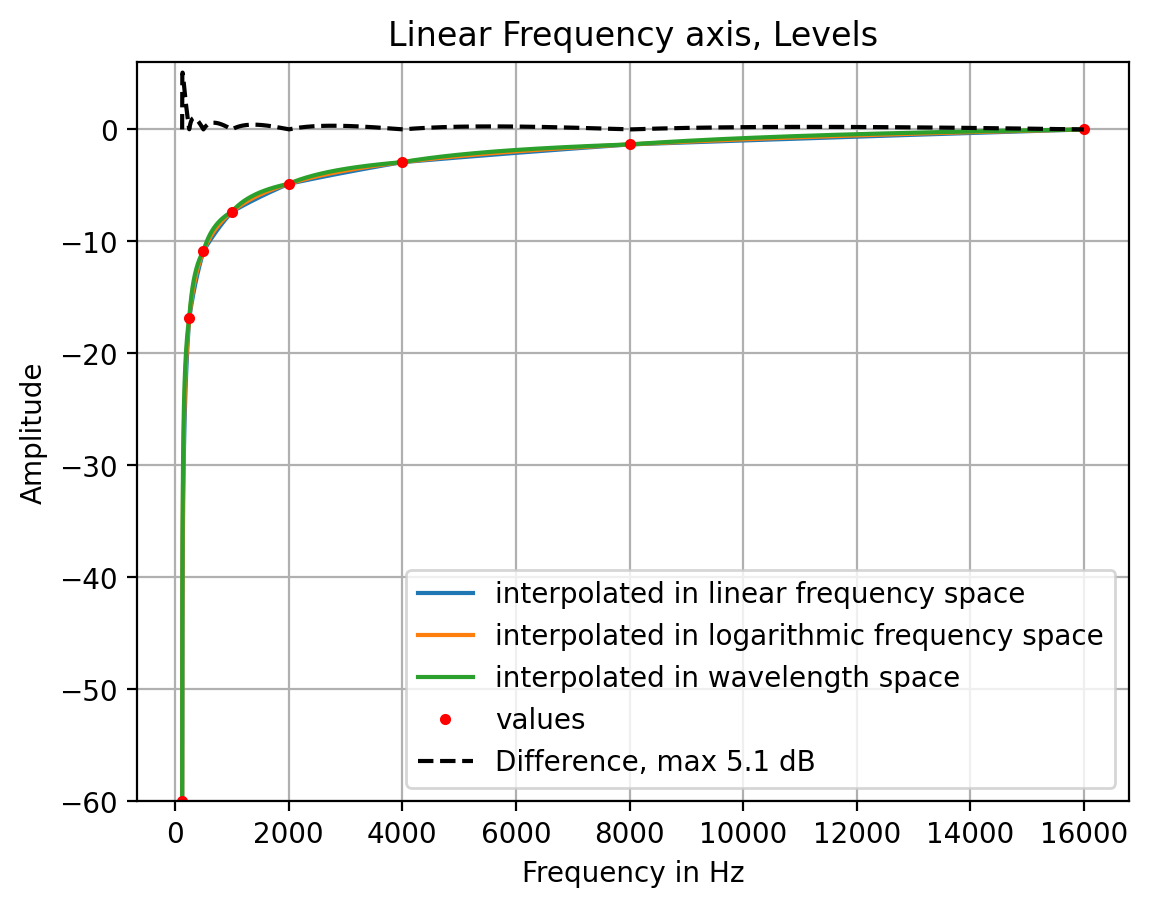

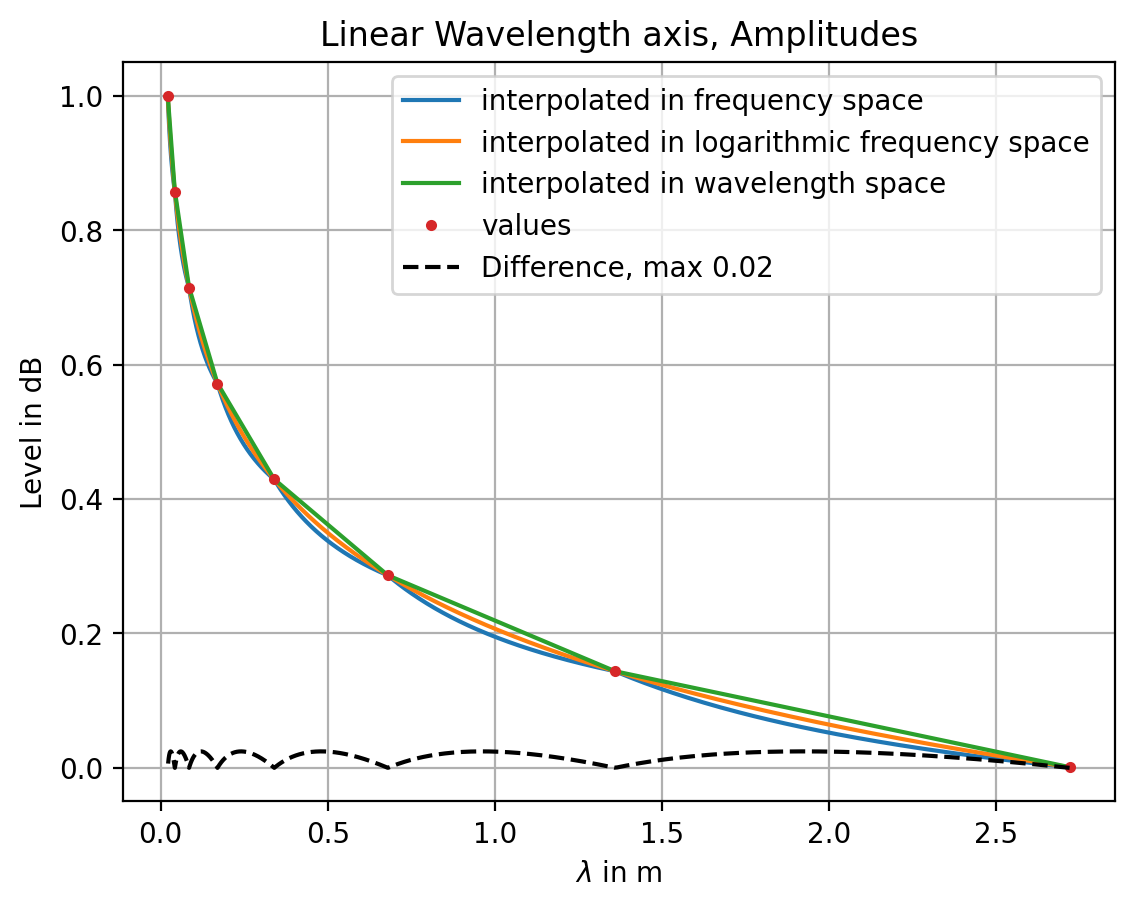

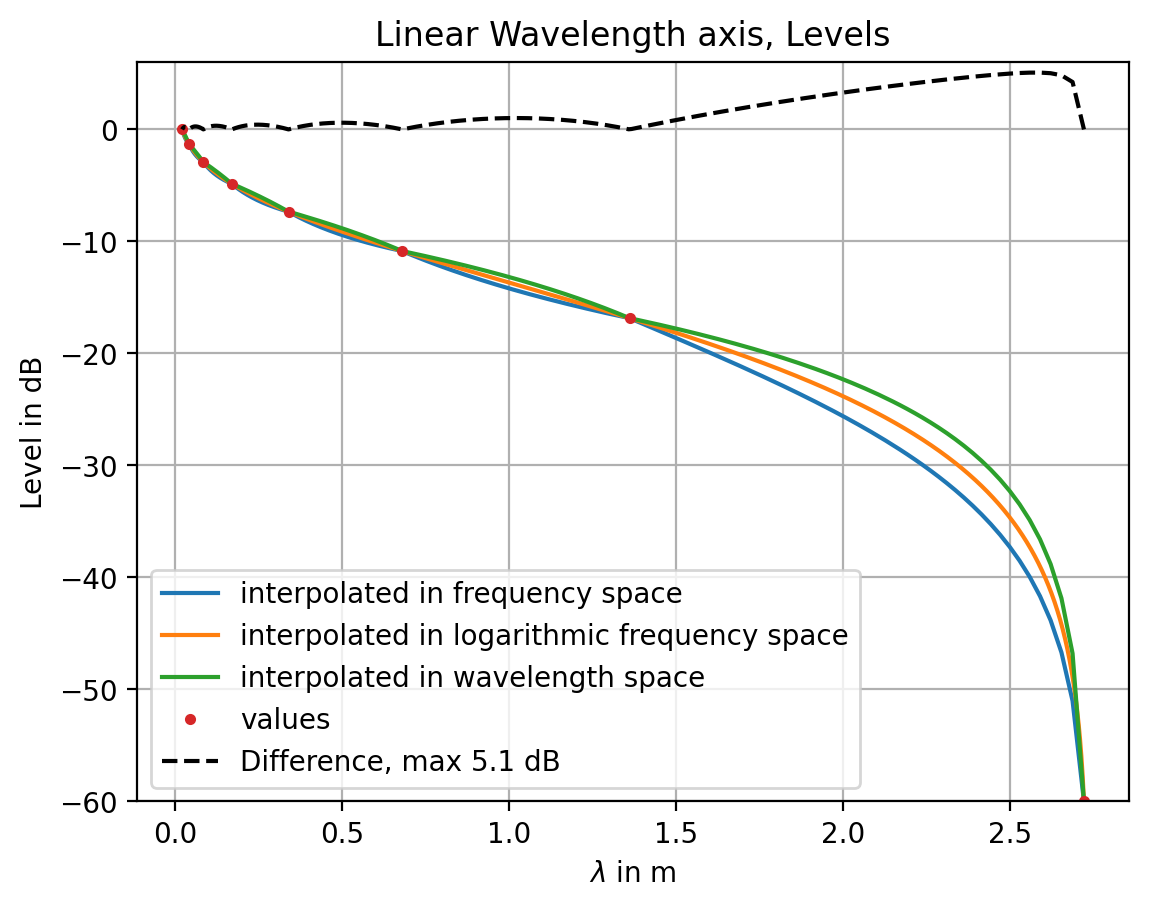

In [117]:
f = np.array([125, 250, 500, 1000, 2000, 4000, 8000, 16000])
values = np.abs(np.linspace(0.001, 1, 8))

f_log = np.log2(f)

N = 10000


#interpolate in linear frequency space
f_interp = interp1d(f, values)
f_fine = np.linspace(f[0], f[-1], N)
values_f_interpolated = f_interp(f_fine)

# interpolate in logarithmic frequency space
f_interp = interp1d(f_log, values)
f_log_fine = np.linspace(f_log[0], f_log[-1], N)
values_f_log_interpolated = f_interp(f_log_fine)

wavelengths = c/f
wavelenghts_fine = c/f_fine


# interpolate to wavelenghts_fine
w_interp = interp1d(wavelengths, values)
values_w_interpolated = w_interp(wavelenghts_fine)



# plot
lower_y_limit = - 60
upper_y_limit = 6

title = 'Logarithmic Frequency axis, Amplitudes'
plt.figure()
plt.semilogx(f_fine, values_f_interpolated,'-', label='interpolated in linear frequency space')
plt.semilogx(2**f_log_fine, values_f_log_interpolated,'-', label='interpolated in logarithmic frequency space')
plt.semilogx(c/wavelenghts_fine, values_w_interpolated ,'-', label='interpolated in wavelength space')
plt.semilogx(f, values, 'r.', label='values')
plt.semilogx(f_fine, np.abs(values_f_interpolated - values_w_interpolated), 'k--', label=f'Difference, max {np.max(np.abs(values_f_interpolated - values_w_interpolated)):.2f}')
plt.xlabel(r'Frequency in Hz')
plt.ylabel(r'Amplitude')
plt.title(title)
plt.grid()
plt.legend()

title = 'Logarithmic Frequency axis, Levels'
plt.figure()
plt.semilogx(f_fine, dB(values_f_interpolated),'-', label='interpolated in linear frequency space')
plt.semilogx(2**f_log_fine, dB(values_f_log_interpolated),'-', label='interpolated in logarithmic frequency space')
plt.semilogx(c/wavelenghts_fine, dB(values_w_interpolated) ,'-', label='interpolated in wavelength space')
plt.semilogx(f, dB(values), 'r.', label='values')
plt.semilogx(f_fine, np.abs(dB(values_f_interpolated) - dB(values_w_interpolated)), 'k--', label=f'Difference, max {np.max(np.abs(dB(values_f_interpolated) - dB(values_w_interpolated))):.1f} dB')
plt.ylim(lower_y_limit, upper_y_limit)
plt.xlabel(r'Frequency in Hz')
plt.ylabel(r'Amplitude')
plt.title(title)
plt.grid()
plt.legend()

title = 'Linear Frequency axis, Amplitudes'
plt.figure()
plt.plot(f_fine, values_f_interpolated,'-', label='interpolated in linear frequency space')
plt.plot(2**f_log_fine, values_f_log_interpolated,'-', label='interpolated in logarithmic frequency space')
plt.plot(c/wavelenghts_fine, values_w_interpolated ,'-', label='interpolated in wavelength space')
plt.plot(f, values, '.', label='values')
plt.plot(f_fine, np.abs(values_f_interpolated - values_w_interpolated), 'k--', label=f'Difference, max {np.max(np.abs(values_f_interpolated - values_w_interpolated)):.2f}')
plt.xlabel(r'Frequency in Hz')
plt.ylabel(r'Amplitude')
plt.title(title)
plt.grid()
plt.legend()

title = 'Linear Frequency axis, Levels'
plt.figure()
plt.plot(f_fine, dB(values_f_interpolated),'-', label='interpolated in linear frequency space')
plt.plot(2**f_log_fine, dB(values_f_log_interpolated),'-', label='interpolated in logarithmic frequency space')
plt.plot(c/wavelenghts_fine, dB(values_w_interpolated) ,'-', label='interpolated in wavelength space')
plt.plot(f, dB(values), 'r.', label='values')
plt.plot(f_fine, np.abs(dB(values_f_interpolated) - dB(values_w_interpolated)), 'k--', label=f'Difference, max {np.max(np.abs(dB(values_f_interpolated) - dB(values_w_interpolated))):.1f} dB')
plt.ylim(lower_y_limit, upper_y_limit)
plt.xlabel(r'Frequency in Hz')
plt.ylabel(r'Amplitude')
plt.title(title)
plt.grid()
plt.legend()

title = 'Linear Wavelength axis, Amplitudes'
plt.figure()
plt.plot(wavelenghts_fine, values_f_interpolated ,'-', label='interpolated in frequency space')
plt.plot(c/(2**f_log_fine), values_f_log_interpolated,'-', label='interpolated in logarithmic frequency space')
plt.plot(wavelenghts_fine, values_w_interpolated ,'-', label='interpolated in wavelength space')
plt.plot(wavelengths, values, '.', label='values')
plt.plot(wavelenghts_fine, np.abs(values_f_interpolated - values_w_interpolated), 'k--', label=f'Difference, max {np.max(np.abs(values_f_interpolated - values_w_interpolated)):.2f}')
plt.xlabel(r'$\lambda$ in m')
plt.ylabel(r'Level in dB')
plt.title(title)
plt.grid()
plt.legend()

title = 'Linear Wavelength axis, Levels'
plt.figure()
plt.plot(wavelenghts_fine, dB(values_f_interpolated) ,'-', label='interpolated in frequency space')
plt.plot(c/(2**f_log_fine), dB(values_f_log_interpolated),'-', label='interpolated in logarithmic frequency space')
plt.plot(wavelenghts_fine, dB(values_w_interpolated) ,'-', label='interpolated in wavelength space')
plt.plot(wavelengths, dB(values), '.', label='values')
plt.plot(wavelenghts_fine, np.abs(dB(values_f_interpolated) - dB(values_w_interpolated)), 'k--', label=f'Difference, max {np.max(np.abs(dB(values_f_interpolated) - dB(values_w_interpolated))):.1f} dB')
plt.ylim(lower_y_limit, upper_y_limit)
plt.xlabel(r'$\lambda$ in m')
plt.ylabel(r'Level in dB')
plt.title(title)
plt.grid()
plt.legend()
plt.show()